<a href="https://colab.research.google.com/github/thual/CLAT-EkmanOceano/blob/main/spiraleEkmanOcean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 24/10/2021. LicenceCC BY-SA*
# Spirale d'Ekman océanique
$$\left\{\begin{matrix} \displaystyle {\partial u \over \partial t} - f v =-  {\partial \over \partial z} \left( K {\partial u \over \partial z}\right) \cr \displaystyle {\partial v \over \partial t} + f u= {\partial \over \partial z} \left( K {\partial v \over \partial z}\right)\end{matrix} \right.$$
$$K= \nu + l^2 \sqrt{\left({\partial \tilde u \over \partial z}\right)^2+\left({\partial \tilde v \over \partial z}\right)^2}\quad \hbox{avec} \quad l(z) = { \kappa z \over 1 + \kappa z / \lambda}$$
 $\kappa = 0,41$,  $\displaystyle \lambda = 2,7 \; 10^{-4} {u_g\over f}$ et $\nu=0,1$ m$^2$.s$^{-1}$

 $K(-z_0) {\partial u\over \partial z}(-z_0) = u_*^2$, ${\partial u\over \partial z}(-z_0)= 0$ et $u(-H)=v(-H) =0$ 


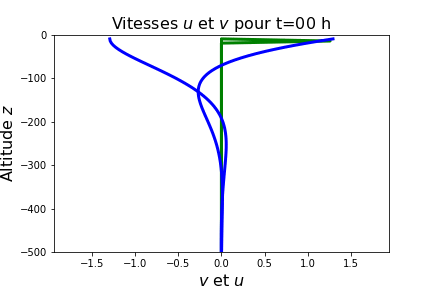

Exéctuez tout d'abord cette première partie !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sous programmes 
def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure(2)
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a
    
def Fuv(u,v):
    dudz=(u[1:]-u[:-1])/dz
    dvdz=(v[1:]-v[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    Kdudz=K*dudz; Kdvdz=K*dvdz
    Fu=f*v[1:-1]+(Kdudz[1:]-Kdudz[:-1])/dz
    Fv=-f*u[1:-1]+(Kdvdz[1:]-Kdvdz[:-1])/dz
    return Fu,Fv,K
    
def advance(u,v):
    for n in range(Nt):
        Fu,Fv,K=Fuv(u,v)
        u[-1]=u[-2]+usc/K[-1]*dz
        v[-1]=v[-2]
        u[1:-1]=u[1:-1]+dt*Fu
        v[1:-1]=v[1:-1]+dt*Fv
        if (n-1)%nplot==0:
            t=round(n*dt/3600)
            plt.xlabel(r'$v$ et $u$',fontsize=16 )
            plt.ylabel(r'Altitude $z$',fontsize=16)    
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)          
            plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
            plt.plot(u,z,linewidth=3,color='green')
            plt.plot(v,z,linewidth=3,color='green')
            plt.plot(ul,z,linewidth=3,color='blue')
            plt.plot(vl,z,linewidth=3,color='blue')
            plt.show()
    return u,v

Paramètres pouvant être changés : 

*  $u_*$ : vitesse de frottement à la surface
*  $H$ : profondeur de la couche limite
*  $z_0$: longueur de rugosité
*  Nhour : nombre d'heures de simulation
*  usdt : inverse du pas de temps
*  $N_z$ : nombre de points de grille

Lancez le programme ci-dessous et allez au bas de la page voir l'annimation !

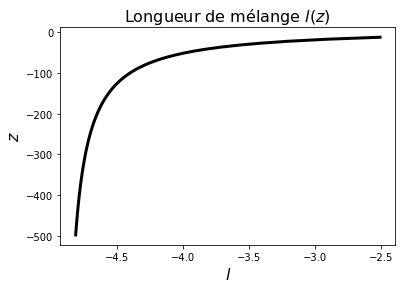

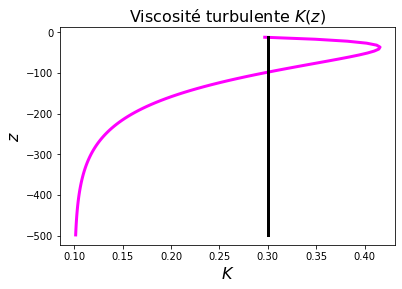

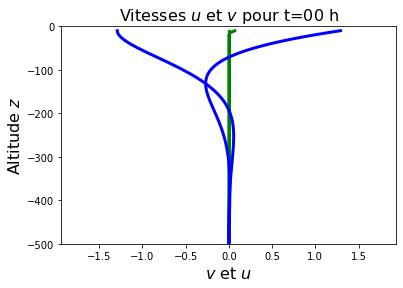

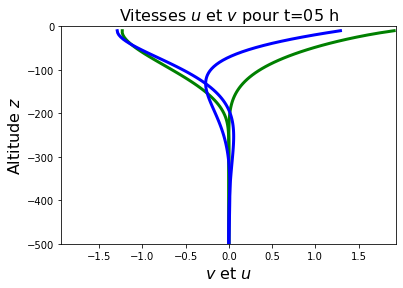

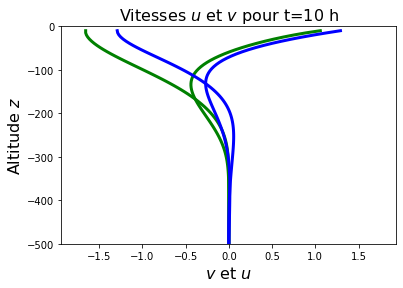

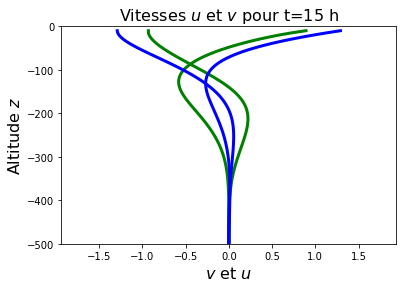

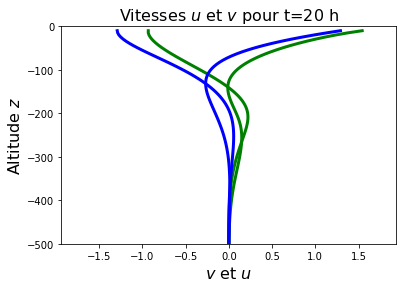

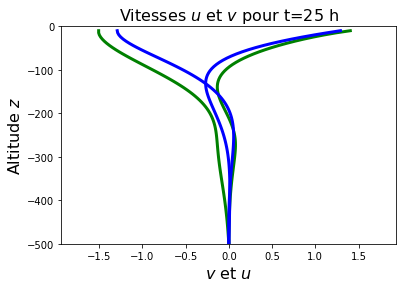

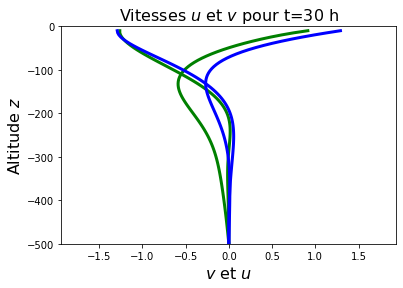

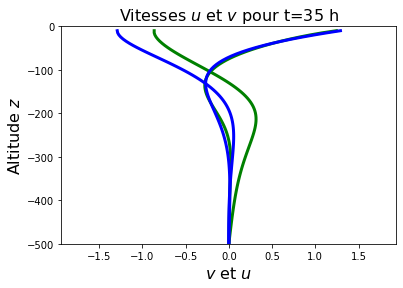

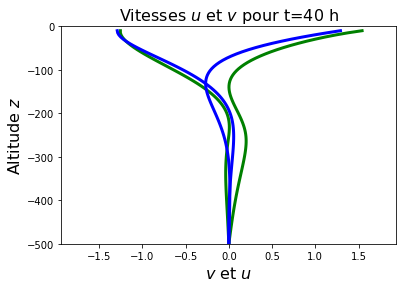

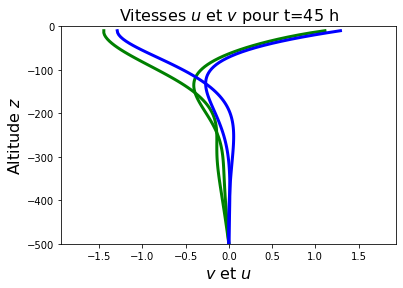

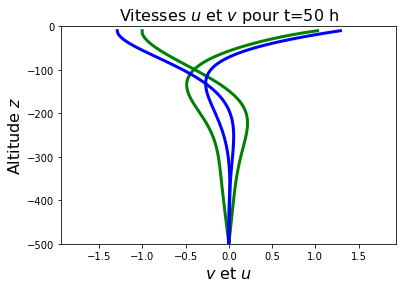

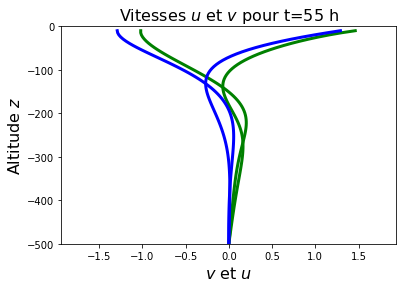

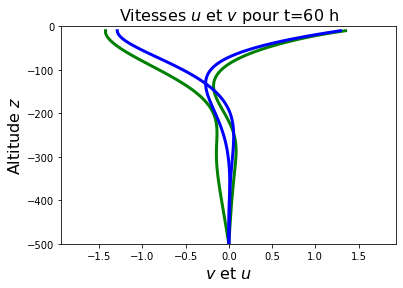

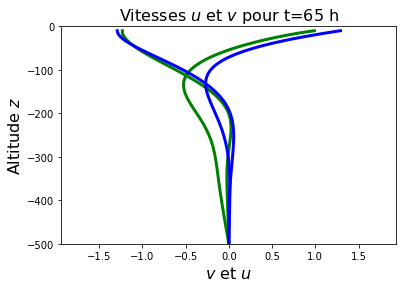

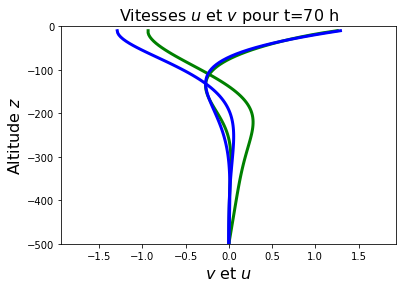

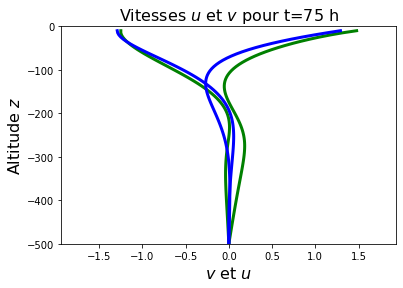

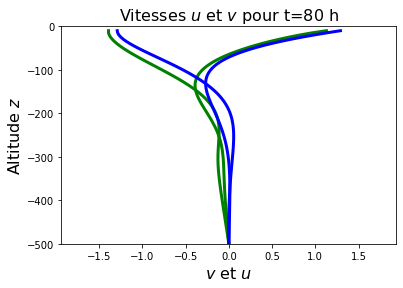

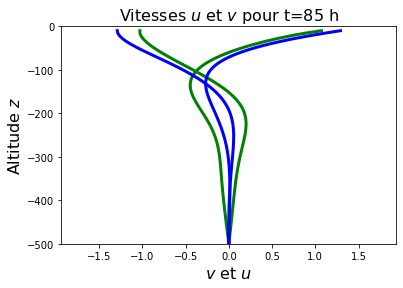

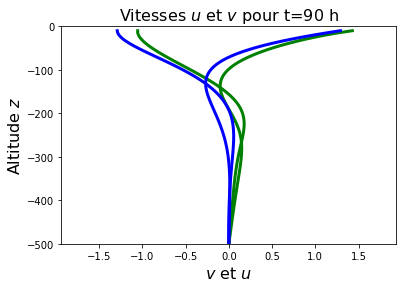

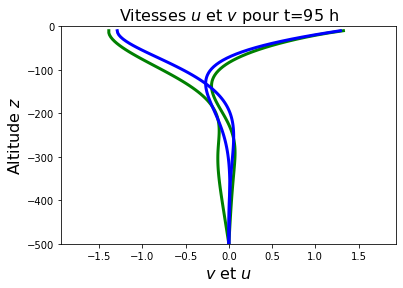

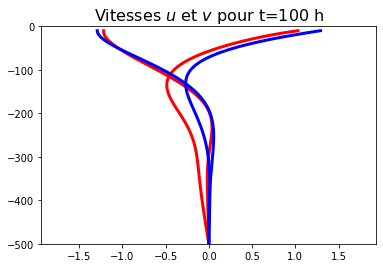

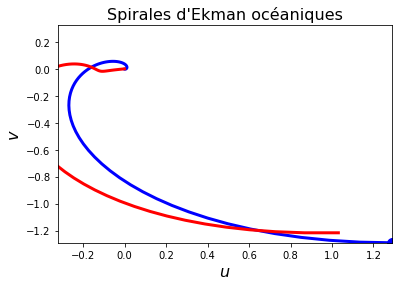

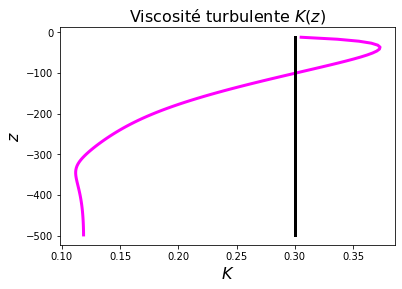

In [ ]:
k=0.41; f=1.e-4;  nu=.1
us=.1; usc=us**2 
H=500; z0=-10; K0=.3;
gam=np.sqrt(f/(2*K0)); 
u0=usc/np.sqrt(f*K0)
# Space
Nhour=100
Nz=100; usdt=1; dt=1/usdt; Nt=Nhour*3600*usdt
z=np.linspace(-H,z0,Nz+2); 
dz=H/Nz; 
zh=.5*(z[1:]+z[:-1])

# Parametrization of l
# Journal of the Earth Simulator, Volume 6, October 2006, 3–15
la=2.7e-4*u0/f
l=la*k*zh/(la-k*zh)

F=False; T=True
# Figure 
if T:
    plt.xlabel(r'$l$',fontsize=16 )
    plt.ylabel(r'$z$',fontsize=16) 
    plt.title(r"Longueur de mélange $l(z)$",fontsize=16)
    plt.plot(l,zh,linewidth=3,color='black')
    plt.savefig("lOcean.pdf")
    plt.savefig("lOcean.png")
    plt.show()

# Temporal
nplot=5*3600*usdt;

# laminar solution
ul=u0*np.exp(gam*(z-z0))*np.cos(gam*(z-z0)-np.pi/4)
vl=u0*np.exp(gam*(z-z0))*np.sin(gam*(z-z0)-np.pi/4)
uls=ul[-1]; vls=vl[-1]
xmin=-1.5*uls; xmax=1.5*uls; 
ymin=-H; ymax=0;

# initial condition
if T:
    u=0*z
    v=0*z
else:
    u=ul.copy()
    v=vl.copy()

# K initial
if T:
    plt.xlabel(r'$K$',fontsize=16 )
    plt.ylabel(r'$z$',fontsize=16) 
    plt.title(r"Viscosité turbulente $K(z)$",fontsize=16)
    dudz=(ul[1:]-ul[:-1])/dz
    dvdz=(vl[1:]-vl[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    plt.plot(K,zh,linewidth=3,color='magenta')
    plt.plot(K0+0*K,zh,linewidth=3,color='black')
    plt.show()

# Loop
if T: 
    u,v=advance(u,v)
    
    # final 
    t=round(Nt*dt/3600);
    plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
       
    # avec longueur de melange
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)          
    plt.plot(u,z,linewidth=3,color='red')
    plt.plot(v,z,linewidth=3,color='red')
    
    # laminar
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)          
    plt.plot(ul,z,linewidth=3,color='blue')
    plt.plot(vl,z,linewidth=3,color='blue')
    plt.show()


# spiral
if T:
    #inifig(xlab='u',ylab='v')  
    plt.xlabel(r'$u$',fontsize=16 )
    plt.ylabel(r'$v$',fontsize=16) 
    plt.xlim(-.25*uls,uls)
    plt.ylim(-uls,.25*uls)          
    plt.title("Spirales d'Ekman océaniques",fontsize=16)
    plt.plot(ul,vl,linewidth=3,color='blue')
    plt.plot(u,v,linewidth=3,color='red')
    plt.scatter(uls,vls,marker='o',color='blue',s=100)
    plt.show()

# K
if T:
    plt.xlabel(r'$K$',fontsize=16 )
    plt.ylabel(r'$z$',fontsize=16) 
    plt.title(r"Viscosité turbulente $K(z)$",fontsize=16)
    dudz=(u[1:]-u[:-1])/dz
    dvdz=(v[1:]-v[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    plt.plot(K,zh,linewidth=3,color='magenta')
    plt.plot(K0+0*K,zh,linewidth=3,color='black')
    plt.show()

















